In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale 

In [2]:
df = pd.read_csv("Resources/NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
# #data = {'PRICE': [df.PRICE]}
# df2 = pd.DataFrame(data)

# # Define the conversion function
# def convert_scientific_to_standard(number):
#     return "{:.0f}".format(number)

# # Apply the conversion function to the 'Value' column
# df2['PRICE'] = df2['PRICE'].apply(convert_scientific_to_standard)

# # Print the updated DataFrame
# print(df2)

In [5]:
 #Check any duplicate record

df.duplicated().sum()

214

In [6]:
# Drop duplicate records

df.drop_duplicates(inplace=True)

In [7]:
df = df[df['TYPE'].isin(['Land for sale'])==False] # leaving houses only

In [8]:
df.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Foreclosure', 'Pending', 'Coming Soon',
       'Mobile house for sale', 'Condop for sale'], dtype=object)

In [9]:
df = df[df['TYPE'].isin(['Foreclosure'])==False]

In [10]:
df = df[df['TYPE'].isin(['Pending'])==False]

In [11]:
df = df[df['TYPE'].isin(['Coming Soon', 'Contingent', 'For sale', 'Mobile house for sale', 'Condop for sale'])==False]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4183 non-null   object 
 1   TYPE                         4183 non-null   object 
 2   PRICE                        4183 non-null   int64  
 3   BEDS                         4183 non-null   int64  
 4   BATH                         4183 non-null   float64
 5   PROPERTYSQFT                 4183 non-null   float64
 6   ADDRESS                      4183 non-null   object 
 7   STATE                        4183 non-null   object 
 8   MAIN_ADDRESS                 4183 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4183 non-null   object 
 10  LOCALITY                     4183 non-null   object 
 11  SUBLOCALITY                  4183 non-null   object 
 12  STREET_NAME                  4183 non-null   object 
 13  LONG_NAME              

In [13]:
df.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale'], dtype=object)

In [14]:
df.TYPE.value_counts()

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Name: count, dtype: int64

In [15]:
#df['PRICE'] = df['PRICE'].apply(lambda x: '{:.9f}'.format(float(x)))

In [16]:
regions = df.groupby('TYPE').mean('PRICE')
regions.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
TYPE,,,,,,
Co-op for sale,1.113426e+06,1.984870,1.438754,1658.496424,40.747603,-73.920662
Condo for sale,2.615780e+06,2.327791,2.002798,1571.731184,40.724426,-73.954237
House for sale,3.786544e+06,3.733954,2.532248,2254.455492,40.678153,-73.946532
Multi-family home for sale,1.666781e+06,6.261803,3.936427,3210.209600,40.700932,-73.927708
Townhouse for sale,6.406234e+06,5.020833,3.874356,3887.512776,40.718419,-73.971435


In [17]:
avg_price = regions.sort_values(by=['PRICE'], ascending=False)

In [18]:
regions.nunique()

PRICE           5
BEDS            5
BATH            5
PROPERTYSQFT    5
LATITUDE        5
LONGITUDE       5
dtype: int64

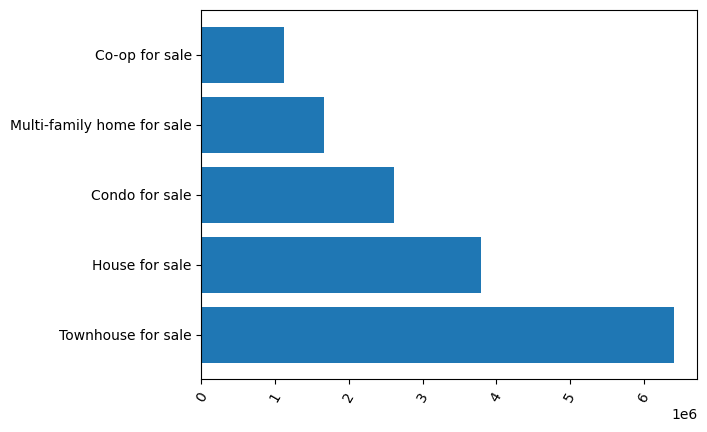

In [19]:
# what are the top 10 sublocalities by price
data = avg_price

plt.barh(data.index, data.PRICE)
plt.xticks(rotation=60)
plt.show()